In [8]:
import numpy as np
from PIL import Image
import os
import sys
import cv2
from Otsu import Otsu
from CurveDetect import CurveDetect
from tools import delete_noise, show_prediction
import sys
sys.path.append("../main/")
from validation import validate
from Devide import Devide

import glob
import matplotlib.pyplot as plt
from enum import Enum

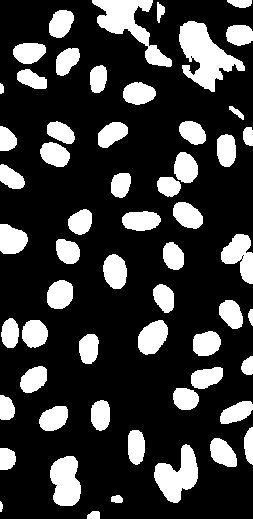

In [9]:
# test画像の分析
TEST_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/stage1_test/"
ANSWER_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/answer_0352/"

filename = "0999dab07b11bc85fb8464fc36c947fbd8b5d6ec49817361cb780659ca805eac"

original_image =  Image.open(TEST_FILE_ROOT + filename + '/images/' + filename + ".png")
predicted_mask =  Image.open(ANSWER_FILE_ROOT + filename + ".png")

original_image_array = np.asarray(original_image)[:, :, :3].copy()
predicted_mask_array = np.asarray(predicted_mask)

predicted_mask

In [11]:
255 - original_image_array

array([[[235, 235, 235],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [213, 213, 213],
        [220, 220, 220],
        [228, 228, 228]],

       [[236, 236, 236],
        [236, 236, 236],
        [238, 238, 238],
        ...,
        [212, 212, 212],
        [220, 220, 220],
        [226, 226, 226]],

       [[235, 235, 235],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [214, 214, 214],
        [219, 219, 219],
        [227, 227, 227]],

       ...,

       [[226, 226, 226],
        [227, 227, 227],
        [229, 229, 229],
        ...,
        [240, 240, 240],
        [241, 241, 241],
        [241, 241, 241]],

       [[228, 228, 228],
        [230, 230, 230],
        [231, 231, 231],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[229, 229, 229],
        [231, 231, 231],
        [233, 233, 233],
        ...,
        [240, 240, 240],
        [240, 240, 240],
        [240, 240, 240]]

In [12]:
devide = Devide(255 - original_image_array, predicted_mask_array)

In [13]:
data = devide.data()

In [14]:
np.unique(data, return_counts=True)

(array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66],
       dtype=int32),
 array([  5675, 100748,    859,    111,    476,    435,    143,    262,
           179,    498,    426,     62,    130,     48,    346,    348,
           388,    527,     31,    409,    473,    443,    277,    148,
           465,    504,    521,    374,    364,    361,    523,    430,
           560,    600,    441,    446,    391,    590,    367,    558,
           410,    457,     30,    404,    516,    691,    528,    425,
           136,    476,    493,    420,    267,    443,    444,    499,
           218,    433,    530,    257,    616,    553,    578,    398,
            62,      7,     79]))

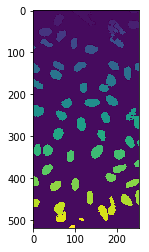

In [15]:
devide.show()

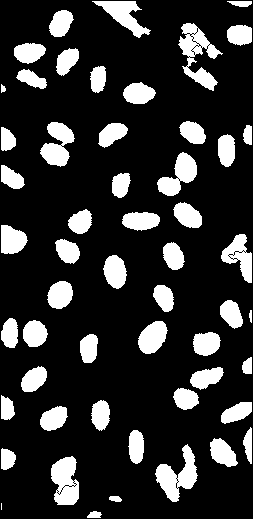

In [16]:
Image.fromarray(devide.make_mask())

In [ ]:
org_img = original_image_array
org_mask = predicted_mask_array

In [ ]:
train_data = org_img[:, :, :3].copy()  # omit alpha channel
train_data_gray = cv2.cvtColor(train_data, cv2.COLOR_RGB2GRAY)
mask_data = org_mask
mask_data = mask_data.copy()

In [ ]:
train_data_gray

In [ ]:
mask_data

In [ ]:
#ヒストグラム正規化により差が出やすくする
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equ = clahe.apply(train_data_gray)